In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Setup

In [2]:
# Parameters
alpha = 0.35
g, n, delta = 0.1, 0.01, 0.1

T = 10 # Final time

In [3]:
# Grid for the time axis
import numpy as np

N = 250
time_grid = np.linspace(0.0, T, N)
dt = T / (N - 1)

def F(K, AL):
    """production function (cobb-douglas)"""
    return K**alpha * (AL)**(1-alpha)

def solow_update(stock_var, s):
    """compute the end-of-period stock variables"""
    K, A, L = stock_var
    K1 = s * F(K, A*L) * dt + (1 - delta * dt) * K
    A1 = (1 + g * dt) * A
    L1 = (1 + n * dt) * L
    return (K1, A1, L1)

def balanced_growth_capital(A, L, s):
    """compute the balanced growth initial stock"""
    return A*L * ((g + n + delta)/s)**(1/(alpha-1))

def saving_rate(s0, s1, threshold):
    """one time change in the saving rate"""
    def _saving_rate(t):
        if t < threshold:
            return s0
        else:
            return s1
    return _saving_rate

## Problem (6)

Note that the golden rule saving rate is $\alpha$.

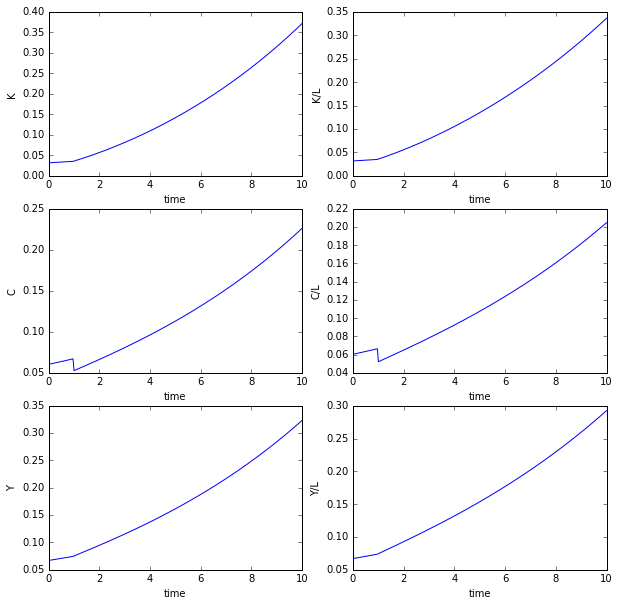

In [4]:
# Saving rate
s0 = 0.1 # 
s1 = 0.3 # s0 < s1 < alpha = golden rule rate
time_of_change = 1.0

s = saving_rate(s0, s1, time_of_change)

# Initial conditions set arbitrarily
A0, L0 = 0.1, 1
K0 = balanced_growth_capital(A0, L0, s(0))
K, A, L = [K0], [A0], [L0]

# Stock variables
for t in time_grid[1:]:
    stock_vars = (K[-1], A[-1], L[-1])  # K[-1] is the last entry of list K
    K1, A1, L1 = solow_update(stock_vars, s(t))
    
    K.append(K1)   # list.append(a) appends a as the last entry of the list
    A.append(A1)
    L.append(L1)


# Variables of interest

Y = []   # Aggregte Income
C = []   # Aggregate Consumption
KL = []  # Per-capita Capital
YL = []  # Per-capita Income
CL = []  # Per-capita Consumption

for K0, A0, L0, t in zip(K, A, L, time_grid):   # Google how zip() works
    KL.append(K0 / L0)
    
    # Income
    Y0 = F(K0, A0*L0)
    Y.append(Y0)
    YL.append(Y0 / L0)
    
    # Consumption
    C0 = (1 - s(t)) * Y0
    C.append(C0)
    CL.append(C0 / L0)
    
# Plotting

fig, ax = plt.subplots(3, 2, figsize=(10,10))

ax[0,0].plot(time_grid, K)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('K')

ax[0,1].plot(time_grid, KL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('K/L')

ax[1,0].plot(time_grid, C)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('C')

ax[1,1].plot(time_grid, CL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('C/L')

ax[2,0].plot(time_grid, Y)
ax[2,0].set_xlabel('time')
ax[2,0].set_ylabel('Y')

ax[2,1].plot(time_grid, YL)
ax[2,1].set_xlabel('time')
ax[2,1].set_ylabel('Y/L')

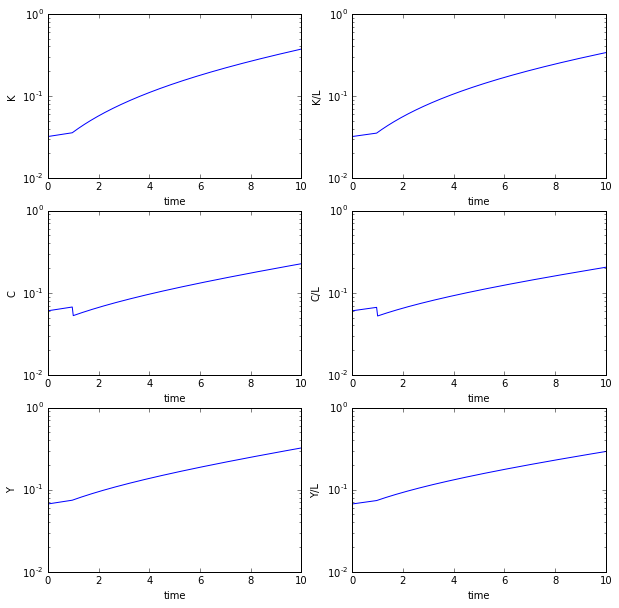

In [5]:
# Plotting in logscale

fig, ax = plt.subplots(3, 2, figsize=(10,10))

ax[0,0].semilogy(time_grid, K)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('K')

ax[0,1].semilogy(time_grid, KL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('K/L')

ax[1,0].semilogy(time_grid, C)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('C')

ax[1,1].semilogy(time_grid, CL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('C/L')

ax[2,0].semilogy(time_grid, Y)
ax[2,0].set_xlabel('time')
ax[2,0].set_ylabel('Y')

ax[2,1].semilogy(time_grid, YL)
ax[2,1].set_xlabel('time')
ax[2,1].set_ylabel('Y/L')

## Problem (7)

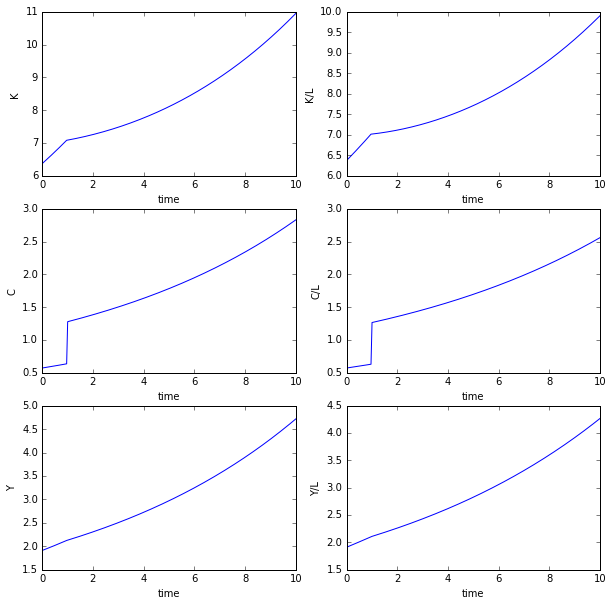

In [6]:
# Saving rate
s0 = 0.7 # 
s1 = 0.4 # s0 < s1 < alpha = golden rule rate
time_of_change = 1.0

s = saving_rate(s0, s1, time_of_change)

# Initial conditions set arbitrarily
A0, L0 = 1, 1
K0 = balanced_growth_capital(A0, L0, s(0))
K, A, L = [K0], [A0], [L0]

# Stock variables
for t in time_grid[1:]:
    stock_vars = (K[-1], A[-1], L[-1])  # K[-1] is the last entry of list K
    K1, A1, L1 = solow_update(stock_vars, s(t))
    
    K.append(K1)   # list.append(a) appends a as the last entry of the list
    A.append(A1)
    L.append(L1)


# Variables of interest

Y = []   # Aggregte Income
C = []   # Aggregate Consumption
KL = []  # Per-capita Capital
YL = []  # Per-capita Income
CL = []  # Per-capita Consumption

for K0, A0, L0, t in zip(K, A, L, time_grid):   # Google how zip() works
    KL.append(K0 / L0)
    
    # Income
    Y0 = F(K0, A0*L0)
    Y.append(Y0)
    YL.append(Y0 / L0)
    
    # Consumption
    C0 = (1 - s(t)) * Y0
    C.append(C0)
    CL.append(C0 / L0)
    
# Plotting

fig, ax = plt.subplots(3, 2, figsize=(10,10))

ax[0,0].plot(time_grid, K)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('K')

ax[0,1].plot(time_grid, KL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('K/L')

ax[1,0].plot(time_grid, C)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('C')

ax[1,1].plot(time_grid, CL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('C/L')

ax[2,0].plot(time_grid, Y)
ax[2,0].set_xlabel('time')
ax[2,0].set_ylabel('Y')

ax[2,1].plot(time_grid, YL)
ax[2,1].set_xlabel('time')
ax[2,1].set_ylabel('Y/L')



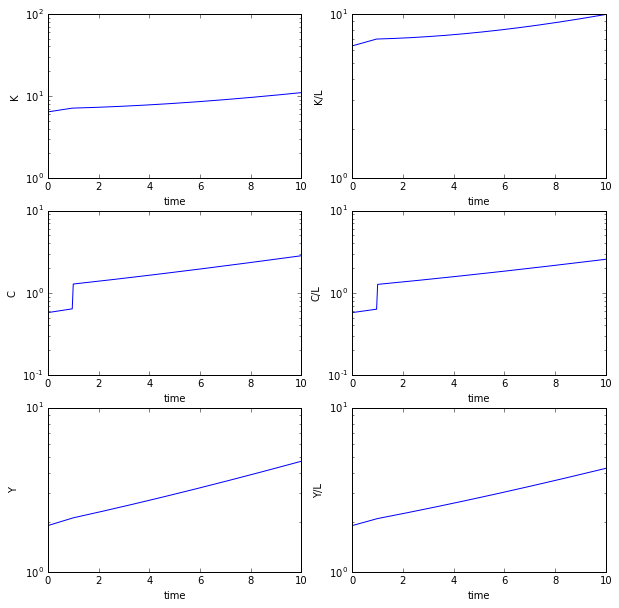

In [7]:
# Plotting with log-scale

fig, ax = plt.subplots(3, 2, figsize=(10,10))

ax[0,0].semilogy(time_grid, K)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('K')

ax[0,1].semilogy(time_grid, KL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('K/L')

ax[1,0].semilogy(time_grid, C)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('C')

ax[1,1].semilogy(time_grid, CL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('C/L')

ax[2,0].semilogy(time_grid, Y)
ax[2,0].set_xlabel('time')
ax[2,0].set_ylabel('Y')

ax[2,1].semilogy(time_grid, YL)
ax[2,1].set_xlabel('time')
ax[2,1].set_ylabel('Y/L')

## Remark

The above graphs may change dramatically depending on how you choose the parameter values. Try different parameters and find what choice might highlight the underlying idea. 